In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
import yfinance as yf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

plt.style.use('fivethirtyeight')


## Define Stock Symbols and Date Range

In [2]:
stocksymbols = ['GOOGL', 'DELL', 'SPY', 'MSFT', 'QQQ', 'AAPL', 'SHEL', 'SPOT']
startdate = "2019-10-14"
end_date = date.today().strftime('%Y-%m-%d')

print(end_date)
print(f"You have {len(stocksymbols)} assets in your portfolio")


2025-01-16
You have 8 assets in your portfolio


## Fetch Data Using yFinance

In [3]:
df = pd.DataFrame()
for i, symbol in enumerate(stocksymbols):
    data = yf.download(symbol, start=startdate, end=end_date)[['Close']]
    data.rename(columns={'Close': symbol}, inplace=True)
    if df.empty:
        df = data
    else:
        df = df.join(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Calculate Expected Annual Return and Sample Covariance Matrix

Covariance between daily simple returns of stocks in your portfolio


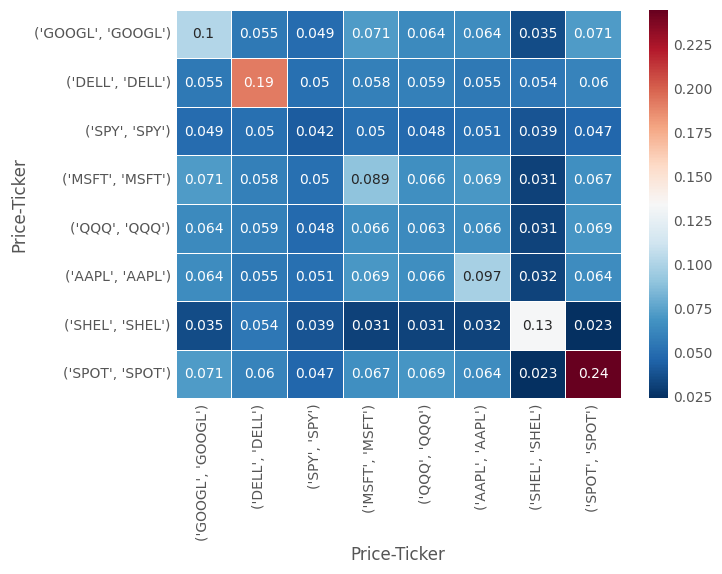

In [4]:
mean = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)  # For sample covariance matrix

plt.style.use('ggplot')
fig = plt.figure()
sb.heatmap(S, xticklabels=S.columns, yticklabels=S.columns,
           cmap='RdBu_r', annot=True, linewidth=0.5)
print('Covariance between daily simple returns of stocks in your portfolio')
plt.show(fig)
